### 삼성전자 주식 분석 및 예측
- 2010-01-01 ~ 2024-06-16 까지의 데이터
- 단위는 원화단위

In [46]:
import yfinance as yf
import pandas as pd

# 종목 코드와 기간 설정
symbols = ['066570.KS', 'GLD']
start_date = '2010-01-01'
end_date = '2024-01-18'

# 삼성전자와 GLD 데이터 다운로드
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# USD/KRW 환율 데이터 다운로드 (FX 코드 사용)
usd_krw = yf.download('KRW=X', start=start_date, end=end_date)['Adj Close']

# GLD 데이터를 원화로 변환
data['GLD_KRW'] = data['GLD'] * usd_krw

data = data.round(4)
w_df = data[['066570.KS', 'GLD_KRW']]
w_df

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed


Ticker,066570.KS,GLD_KRW
Date,,
2010-01-04,112850.1484,124337.5261
2010-01-05,112402.3438,125200.6119
2010-01-06,111506.6953,126050.9091
2010-01-07,102998.1562,125769.6204
2010-01-08,99415.6172,125079.6474
...,...,...
2024-01-11,95000.0000,247518.7186
2024-01-12,94700.0000,248897.6299
2024-01-15,95100.0000,NaN


In [47]:
# DatetimeIndex확인 및 결측치 확인
w_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3641 entries, 2010-01-04 to 2024-01-17
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   066570.KS  3462 non-null   float64
 1   GLD_KRW    3527 non-null   float64
dtypes: float64(2)
memory usage: 85.3 KB


In [48]:
# 피쳐명 변경
w_df = w_df.rename(columns={'066570.KS':'SK', 'GLD_KRW':'GLD'})
w_df

Ticker,SK,GLD
Date,,
2010-01-04,112850.1484,124337.5261
2010-01-05,112402.3438,125200.6119
2010-01-06,111506.6953,126050.9091
2010-01-07,102998.1562,125769.6204
2010-01-08,99415.6172,125079.6474
...,...,...
2024-01-11,95000.0000,247518.7186
2024-01-12,94700.0000,248897.6299
2024-01-15,95100.0000,NaN


In [49]:
# 결측치 제거
w_df.dropna(inplace=True)
w_df

Ticker,SK,GLD
Date,,
2010-01-04,112850.1484,124337.5261
2010-01-05,112402.3438,125200.6119
2010-01-06,111506.6953,126050.9091
2010-01-07,102998.1562,125769.6204
2010-01-08,99415.6172,125079.6474
...,...,...
2024-01-10,97200.0000,247460.6323
2024-01-11,95000.0000,247518.7186
2024-01-12,94700.0000,248897.6299


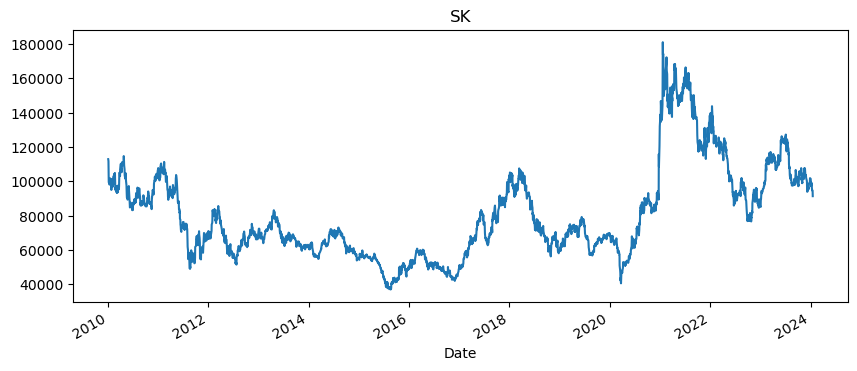

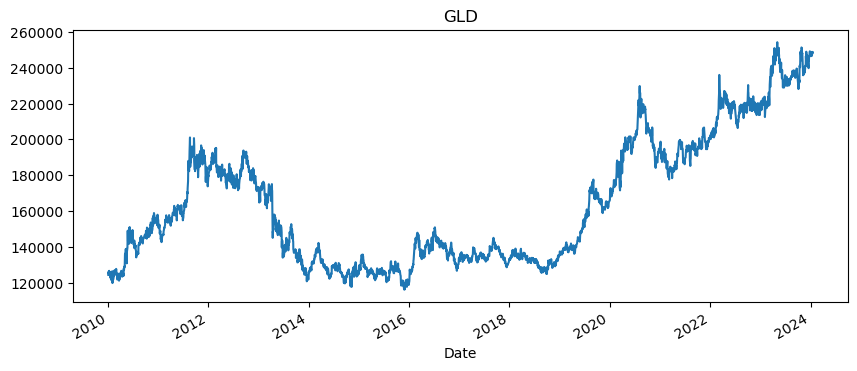

In [50]:
import matplotlib.pyplot as plt

# 삼성전자와 GLD의 전체적인 주가 확인

w_df.SK.plot(figsize=(10, 4), subplots=True)
plt.title('SK')
plt.show()

w_df.GLD.plot(figsize=(10, 4), subplots=True)
plt.title('GLD')
plt.show()

- 2016 ~ 2018년 스마트워치 및 갤럭시 시리즈, 갤럭시 노트등의 인기로 꽤 높은 상승세를 보이고,  
  가장 높은 상승치를 보인 2021 ~ 2022년도는 갤럭시 플립, 폴드등의 폴더블폰의 영향인것으로 추정된다.

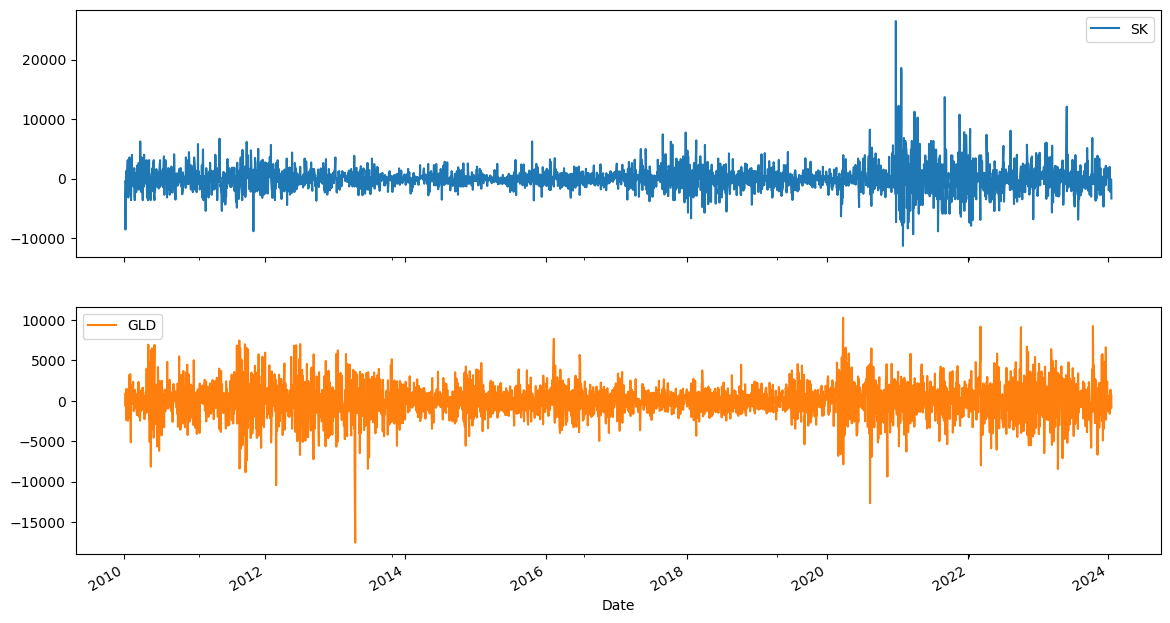

In [51]:
# 차분
w_df.diff().plot(figsize=(14, 8), subplots=True)
plt.show()

- 차분 후 시각화 결과 삼성전자의 분산이 생각보다 일정하게 나타났다.

<Axes: xlabel='Ticker'>

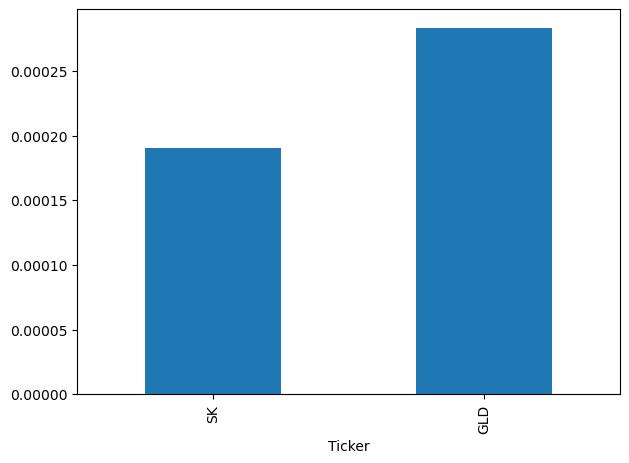

In [52]:
# 변동성 확인
w_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))

- 확실히 안정적인 GLD보단 삼성전자의 변화량이 크게 나타난 모습이다.

In [53]:
import numpy as np

# 수익률 계산
rate_w_df = np.log(w_df / w_df.shift(1))
rate_w_df

Ticker,SK,GLD
Date,,
2010-01-04,NaN,NaN
2010-01-05,-0.003976,0.006917
2010-01-06,-0.008000,0.006769
2010-01-07,-0.079374,-0.002234
2010-01-08,-0.035402,-0.005501
...,...,...
2024-01-10,-0.008197,0.003782
2024-01-11,-0.022894,0.000235
2024-01-12,-0.003163,0.005555


<Axes: xlabel='Date'>

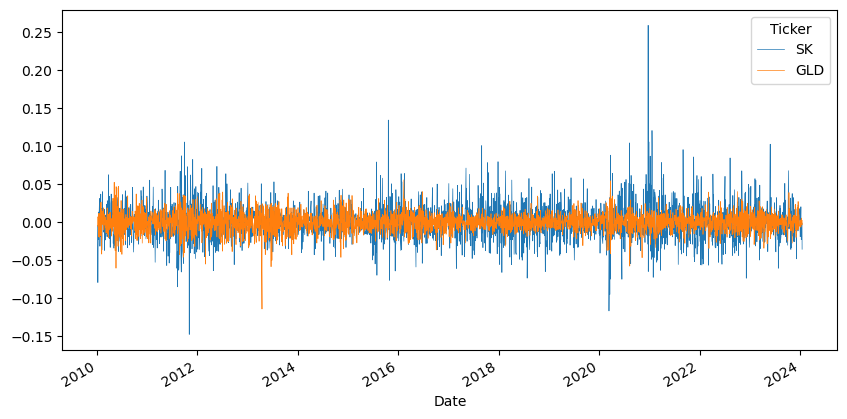

In [54]:
# 수익률 변동성 확인
rate_w_df[['SK', 'GLD']].plot(figsize=(10, 5), lw=0.5)

In [55]:
# 연율화
# 연간 영업일(약 252일로 계산)
# 전년도 연율화
rate_w_df.mean() * 252

Ticker
SK    -0.015955
GLD    0.052170
dtype: float64

- 연율화를 통해 수익을 비교해보았을 때, 삼성전자의 연간 수익율이 그렇게 높지 않다는것을 확인할 수 있습니다.
- GLD또한 금EFT 답게 큰 차이가 없다는점을 미뤄보아 삼성전자의 수치가 낮다는것을 확인할 수 있습니다.

In [56]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [57]:
# vif스코어를 통해 삼성전자 주가와 GLD(금 ETF)는 서로 연관이 없음을 확인
rate_w_df = rate_w_df.dropna()
get_vif(rate_w_df)

,vif_score,feature
0,1.001749,SK
1,1.001749,GLD


- vif스코어를 통해 GLD와 삼성전자의 상관관계는 거의 없을을 알 수 있습니다.

<function matplotlib.pyplot.show(close=None, block=None)>

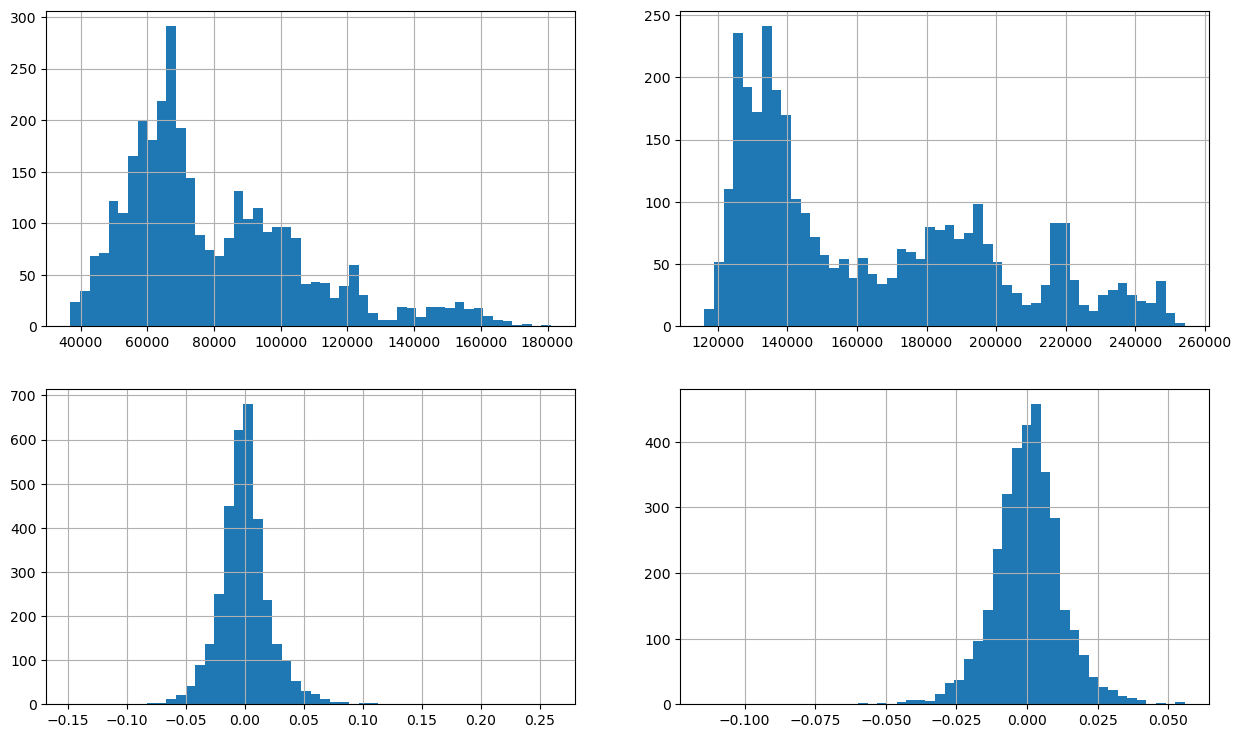

In [58]:
# log변환을 통해 바뀐 분포 확인

fig, ax = plt.subplots(2, 2, figsize=(15, 9))

w_df.SK.hist(ax=ax[0][0], bins=50)
w_df.GLD.hist(ax=ax[0][1], bins=50)

rate_w_df.SK.hist(ax=ax[1][0], bins=50)
rate_w_df.GLD.hist(ax=ax[1][1], bins=50)

plt.show

- 데이터 비교의 편의성과 신뢰성을 위해 로그 변환을 통해 분포 조정

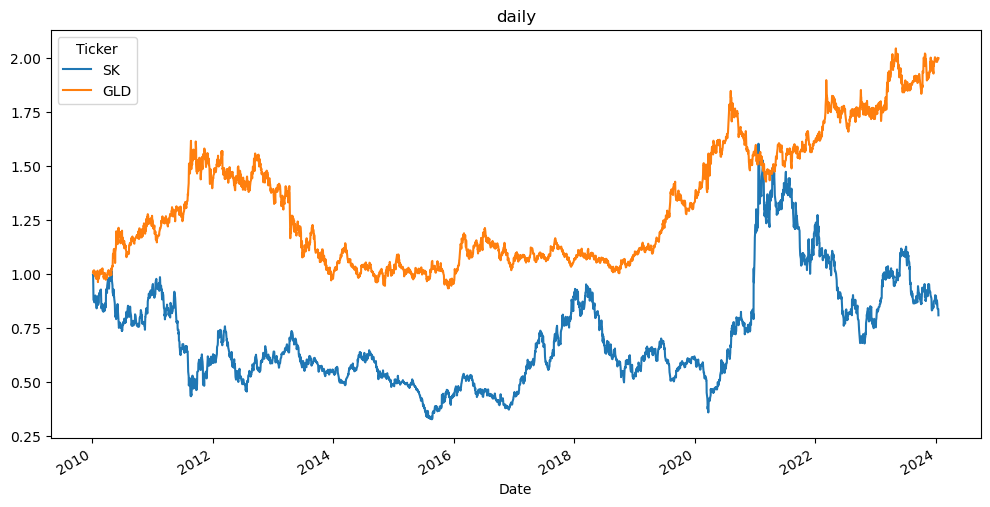

In [59]:
# 일간 수익률
rate_w_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.title('daily')
plt.show()

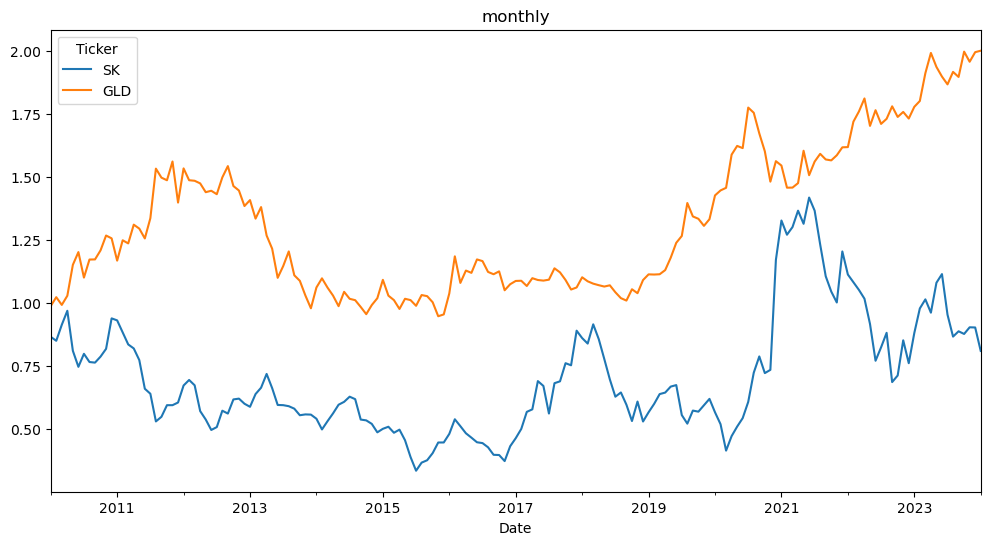

In [60]:
# 월간 수익률
rate_w_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.title('monthly')
plt.show()

In [61]:
s_df = w_df[['SK']]
s_df

Ticker,SK
Date,
2010-01-04,112850.1484
2010-01-05,112402.3438
2010-01-06,111506.6953
2010-01-07,102998.1562
2010-01-08,99415.6172
...,...
2024-01-10,97200.0000
2024-01-11,95000.0000
2024-01-12,94700.0000


In [62]:
window = 20

# 20일간의 데이터를 최소, 최대, 평균을 구해줌
s_df['min'] = s_df['SK'].rolling(window=window).min()
s_df['mean'] = s_df['SK'].rolling(window=window).mean()
s_df['median'] = s_df['SK'].rolling(window=window).median()
s_df['max'] = s_df['SK'].rolling(window=window).max()

s_df.dropna()

Ticker,SK,min,mean,median,max
Date,,,,,
2010-02-01,99415.6172,94937.4297,101027.757420,99191.6992,112850.1484
2010-02-02,99415.6172,94937.4297,100356.030860,99191.6992,112402.3438
2010-02-03,101206.8750,94937.4297,99796.257420,99191.6992,111506.6953
2010-02-04,100311.2422,94937.4297,99236.484765,99191.6992,102998.1562
2010-02-05,96728.7031,94937.4297,98923.012110,98743.8828,101654.7109
...,...,...,...,...,...
2024-01-10,97200.0000,94240.0000,97880.279685,97900.0000,101800.0000
2024-01-11,95000.0000,95000.0000,97918.279685,97900.0000,101800.0000
2024-01-12,94700.0000,94700.0000,97856.959765,97900.0000,101800.0000


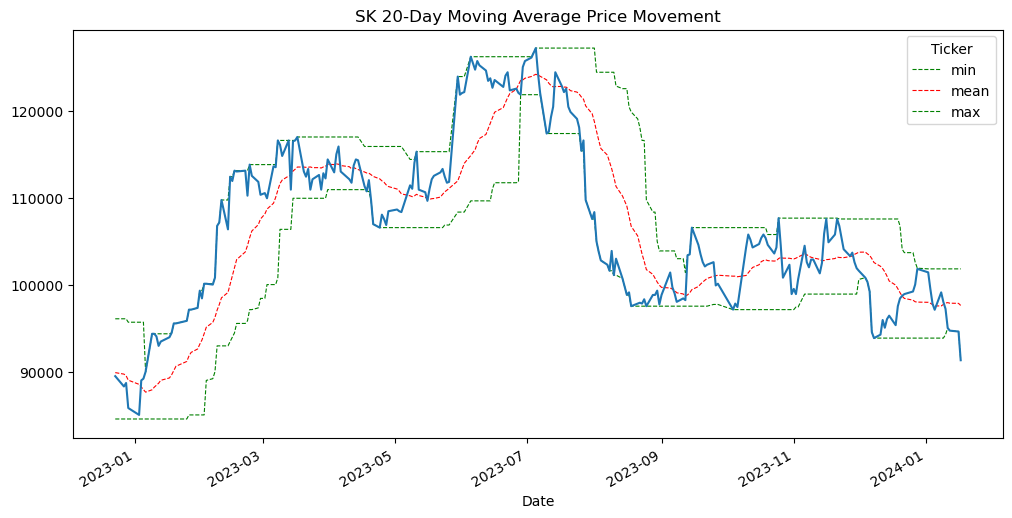

In [63]:
import matplotlib.pyplot as plt

# 최소, 최대, 평균값 시각화
ax = s_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
s_df['SK'].iloc[-252:].plot(ax=ax)
plt.title("SK 20-Day Moving Average Price Movement")
plt.show()

- 20일 평균 이동평균을 보았을 때 24년도 4월쯤에 최대값과 최소값이 크게 차이나는것을 확인할 수 있었습니다.,

In [64]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

s_df['SMA1'] = s_df['SK'].rolling(window=21).mean() #short-term
s_df['SMA2'] = s_df['SK'].rolling(window=252).mean() #long-term
s_df[['SK', 'SMA1', 'SMA2']].tail()

Ticker,SK,SMA1,SMA2
Date,,,
2024-01-10,97200.0,97688.037571,106650.856494
2024-01-11,95000.0,97743.123510,106688.427612
2024-01-12,94700.0,97765.028271,106727.932913
2024-01-16,94600.0,97701.866443,106767.822515
2024-01-17,91300.0,97524.075890,106777.431425


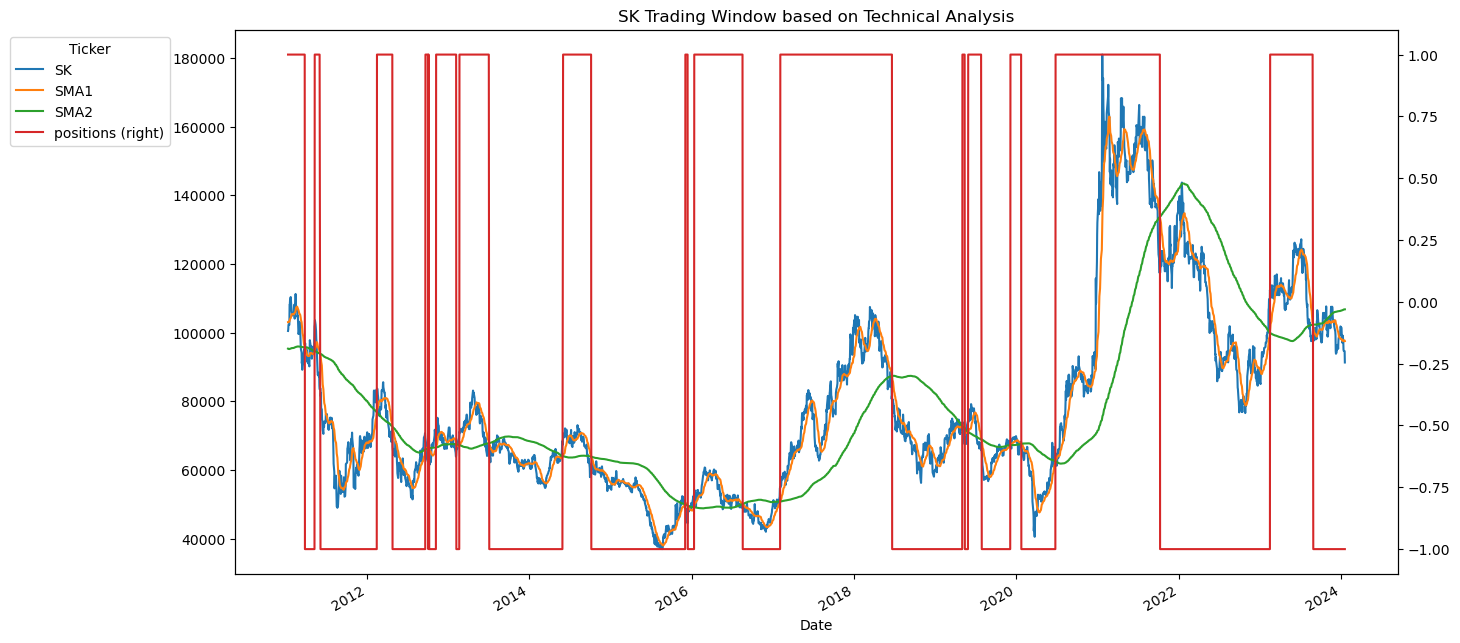

In [65]:
# 삼성전자 주가 기술 분석
# 골든 크로스, 데드 크로스
s_df.dropna(inplace=True)

s_df['positions'] = np.where(s_df['SMA1'] > s_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = s_df[['SK', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 8), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("SK Trading Window based on Technical Analysis")
plt.show()

- 골든 크로스와 데드크로스가 굉장히 많이 나타난 모습이다.
- 이는 삼성전자가 대기업이기때문에 크고작은일에 변동이 많이 나타나기 떄문으로 추정됩니다.

### Auto-arima

In [66]:
s_df = s_df['2022-01-01':]
s_df

Ticker,SK,min,mean,median,max,SMA1,SMA2,positions
Date,,,,,,,,
2022-01-04,139764.7188,119339.9297,128002.154295,126676.39840,139764.7188,127589.667410,142128.314944,-1
2022-01-05,136319.8125,120318.1250,128851.148435,126920.94920,139764.7188,128398.233257,142310.207429,-1
2022-01-06,132874.9062,120318.1250,129430.077340,127410.04690,139764.7188,129042.755948,142463.436843,-1
2022-01-07,135335.5625,120318.1250,130058.674605,129366.44535,139764.7188,129711.290919,142627.968465,-1
2022-01-10,127953.6250,120318.1250,130415.994135,129515.96095,139764.7188,129958.434148,142767.435417,-1
...,...,...,...,...,...,...,...,...
2024-01-10,97200.0000,94240.0000,97880.279685,97900.00000,101800.0000,97688.037571,106650.856494,-1
2024-01-11,95000.0000,95000.0000,97918.279685,97900.00000,101800.0000,97743.123510,106688.427612,-1
2024-01-12,94700.0000,94700.0000,97856.959765,97900.00000,101800.0000,97765.028271,106727.932913,-1


In [67]:
# 데이터의 80퍼센트를 train, 나머지를 test데이터로 분리
y_train = s_df.SK[:int(0.8 * len(s_df))]
y_test = s_df.SK[int(0.8 * len(s_df)):]

<Axes: xlabel='Date'>

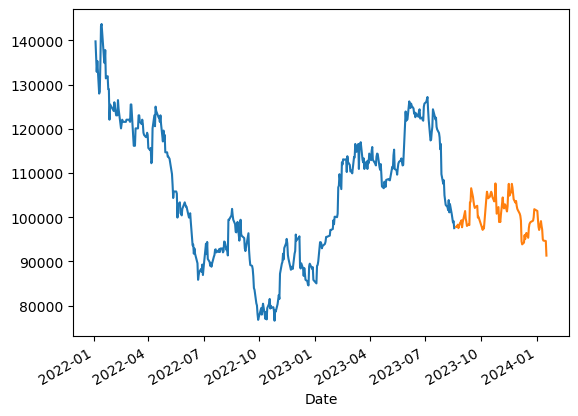

In [68]:
y_train.plot()
y_test.plot()

In [69]:
from pmdarima.arima import ndiffs
# KPSS(Kwaiatkowski-Phillips-Schmidt-Shin)
# 차분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다."로 설정한 뒤
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.

# alpha: 유의수준(기각 영가설 설정, 주로 0.05로 설정)
# test: 단위근 검정 방법 설정
# max_d: 최대차분 횟수 설정
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

# 최적 차분 횟수
print(f'd = {n_diffs}')

d = 1


In [70]:
import pmdarima as pm

model = pm.auto_arima(y=y_train, 
                      d=2, 
                      start_p=0, max_p=10, 
                      start_q=0, max_q=10, 
                      m=1, seasonal=False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=7349.395, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=7338.776, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=7360.801, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7347.401, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=7316.016, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=7335.310, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=7314.031, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=7336.739, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=7333.169, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.30 s

In [71]:
model.fit(y_train)

ARIMA(order=(2, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [72]:
# Prob(Q), 융-박스 검정 통계량
# 영가설: 잔차가 백색잡음 시계열을 따른다.
# 0.05 이상: 서로 독립이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 영가설: 잔차가 이분산성을 띠지 않는다.
# 0.05 이상: 잔차의 분산이 일정하다.

# Prob(JB), 자크-베라 검정 통계량
# 영가설: 잔차가 정규성을 따른다.
# 0.05 이상: 일정한 평균과 분산을 따른다.

# Skew(쏠린 정도, 왜도)
# 0에 가까워야 한다.

# Kurtosis(뾰족한 정도, 첨도)
# 3에 가까워야 한다.

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  386
Model:               SARIMAX(2, 2, 0)   Log Likelihood               -3654.016
Date:                Mon, 24 Jun 2024   AIC                           7314.031
Time:                        10:43:50   BIC                           7325.883
Sample:                             0   HQIC                          7318.732
                                - 386                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2361      0.007    -35.429      0.000      -0.249      -0.223
ar.L2         -0.1330      0.006    -22.213      0.000      -0.145      -0.121
sigma2      7.425e+06   4.04e-11   1.84e+17      0.0

- Prob(Q), 융-박스 검정 통계량이 0.00으로 데이터가 서로 독립적이지 않고, 동일하지 않은 분포를 가졌다고 판단이 됩니다.
- Prob(H), 이분산성 검정 통계량이 0.08으로 잔차의 분산이 일정하다고 판단됩니다.
- Prob(JB), 자크-베라 검정 통계량이 0.00으로 일정한 평균과 분산을 따르지 않는다고 판단됩니다.
- Skew가 -0.01로 거의 0에 근접한 값을 보아 분포가 거의 대칭적이라고 판단되며,
- Kurtosis는 4.83으로 첨도가 높아 분포의 꼬리가 두껍게 나타날것이라 판단됩니다.

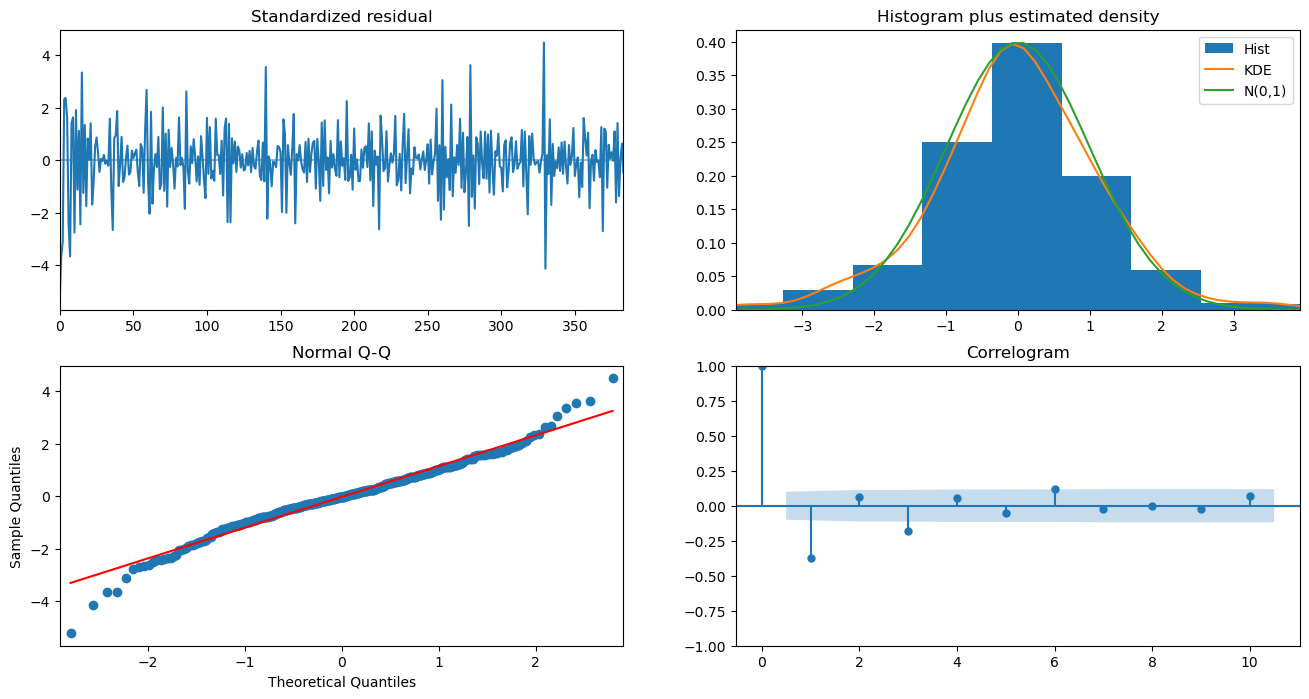

In [73]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16, 8))
plt.show()

- 분산이 조금씩 튀는값이 있지만 어느정도는 일정합니다.
- 편향도 나쁘지않지만 양쪽 끝에 조금 튀는값을 확인하였습니다.
- 분포는 정규분포 형태로 잘 나타난것을 확인하였고, 값이 조금은 일정한 범위내에 있다고 판단하였습니다.

In [74]:
prediction = model.predict(n_periods=len(y_test))
prediction

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


386    96081.167604
387    94862.846607
388    93573.393614
389    92272.260505
390    90983.344558
           ...     
478   -22630.854584
479   -23921.929517
480   -25213.004450
481   -26504.079383
482   -27795.154316
Length: 97, dtype: float64

In [75]:
prediction, conf_int = model.predict(n_periods=1, return_conf_int=True)
print(conf_int)
print(prediction)

[[ 90740.64005922 101421.69514802]]
386    96081.167604
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [76]:
prediction.tolist()[0]

96081.1676036214

In [77]:
# predict한 값을 반환
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [78]:
# predict_one_step으로 반환된 predict를 하나씩 p_list에 담아주고, model 업데이트

p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [79]:
# test데이터와 위에서 만들어진 p_list를 dataFrame으로 만들어줌
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
Date,,
2023-08-21,97811.1953,96081.167604
2023-08-22,97910.3984,97914.109337
2023-08-23,97811.1953,97805.880473
2023-08-24,98307.1953,97785.232380
2023-08-25,97513.6016,98688.971137
...,...,...
2024-01-10,97200.0000,97296.799925
2024-01-11,95000.0000,96757.096373
2024-01-12,94700.0000,93107.097196


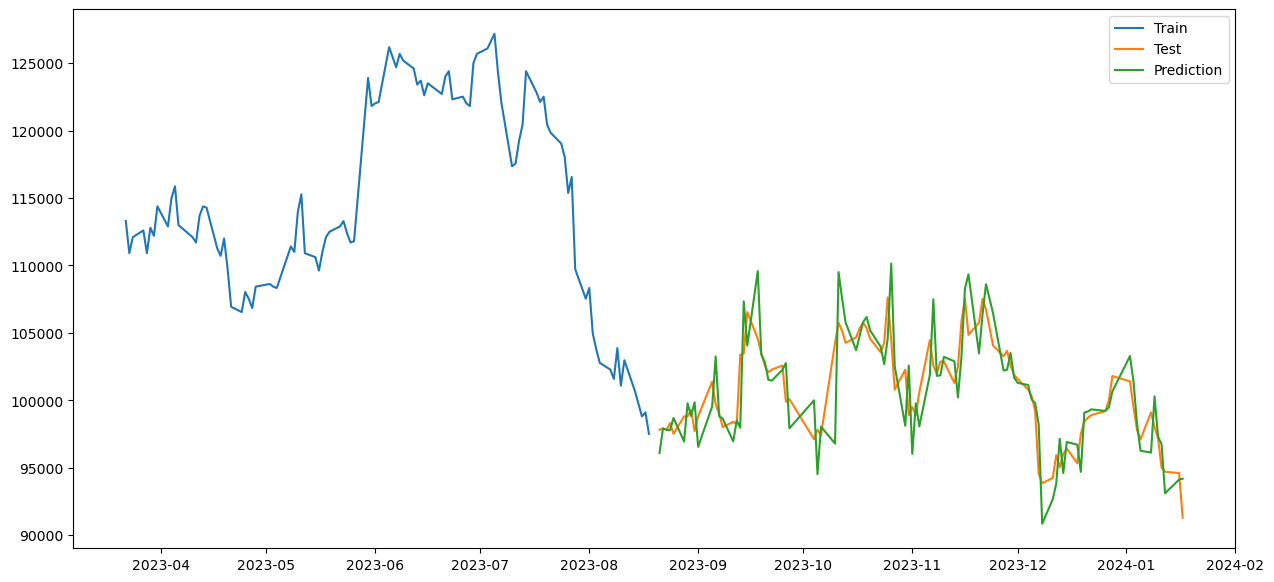

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

# 예측된 결과와 정답 비교 시각화
plt.plot(y_train.iloc[-100:], label='Train')
plt.plot(y_test.iloc[-639:], label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [81]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 오차
print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 1.7124


- 오차가 1.5%정도로 잘 맞춘다고 판단이 됩니다.

### 딥러닝

In [82]:
pre_s_df = w_df['2022-01-01':]
pre_s_df = pre_s_df.SK.reset_index()
pre_s_df

,Date,SK
0,2022-01-04,139764.7188
1,2022-01-05,136319.8125
2,2022-01-06,132874.9062
3,2022-01-07,135335.5625
4,2022-01-10,127953.6250
...,...,...
478,2024-01-10,97200.0000
479,2024-01-11,95000.0000
480,2024-01-12,94700.0000
481,2024-01-16,94600.0000


In [83]:
pre_s_df = pre_s_df.rename(columns={'Date': 'ds', 'SK': 'y'})
pre_s_df

,ds,y
0,2022-01-04,139764.7188
1,2022-01-05,136319.8125
2,2022-01-06,132874.9062
3,2022-01-07,135335.5625
4,2022-01-10,127953.6250
...,...,...
478,2024-01-10,97200.0000
479,2024-01-11,95000.0000
480,2024-01-12,94700.0000
481,2024-01-16,94600.0000


- Prophet사용을 위해 날짜와 타겟을 ds와 y로 이름 변경

In [84]:
from prophet import Prophet

model = Prophet().fit(pre_s_df)

10:43:53 - cmdstanpy - INFO - Chain [1] start processing
10:43:53 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-04,130545.754393,124175.278209,136923.640718
1,2022-01-05,130825.225578,124964.468133,136733.851682
2,2022-01-06,130686.860048,124335.131724,137038.669424
3,2022-01-07,130635.049170,124759.415241,137010.239263
4,2022-01-10,130197.046985,124078.749304,136162.148372
...,...,...,...,...
843,2025-01-12,88648.090851,63403.054862,113814.134627
844,2025-01-13,86592.813758,60659.417660,112669.598243
845,2025-01-14,86748.513494,61196.649307,111750.674472
846,2025-01-15,87011.294843,62370.373994,113332.213393


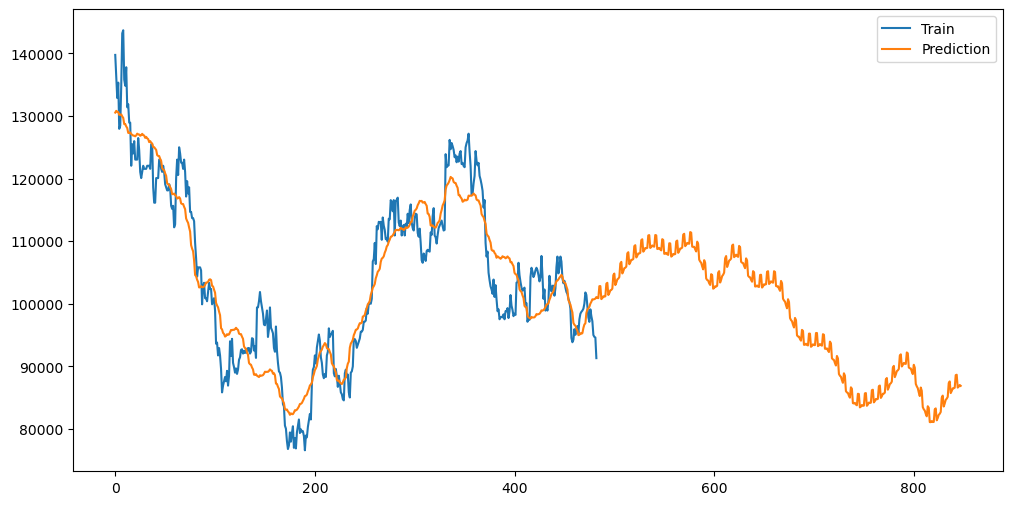

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(pre_s_df[['y']], label='Train')
plt.plot(forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

- 정확히 맞추지는 못하지만 어느정도의 추세는 맞는 모습이며, 계속 오를것이라고 예측하였다.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


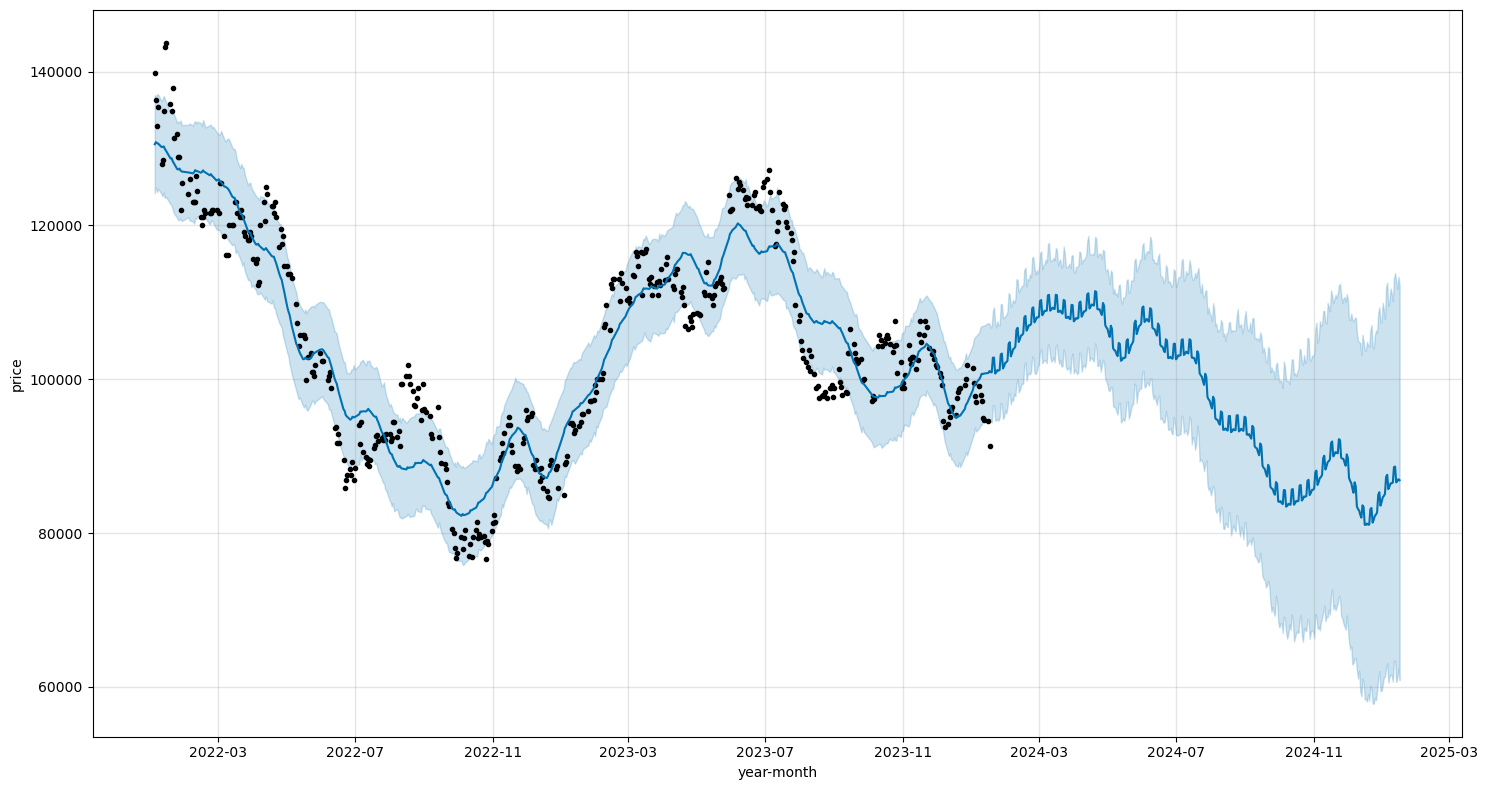

In [87]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

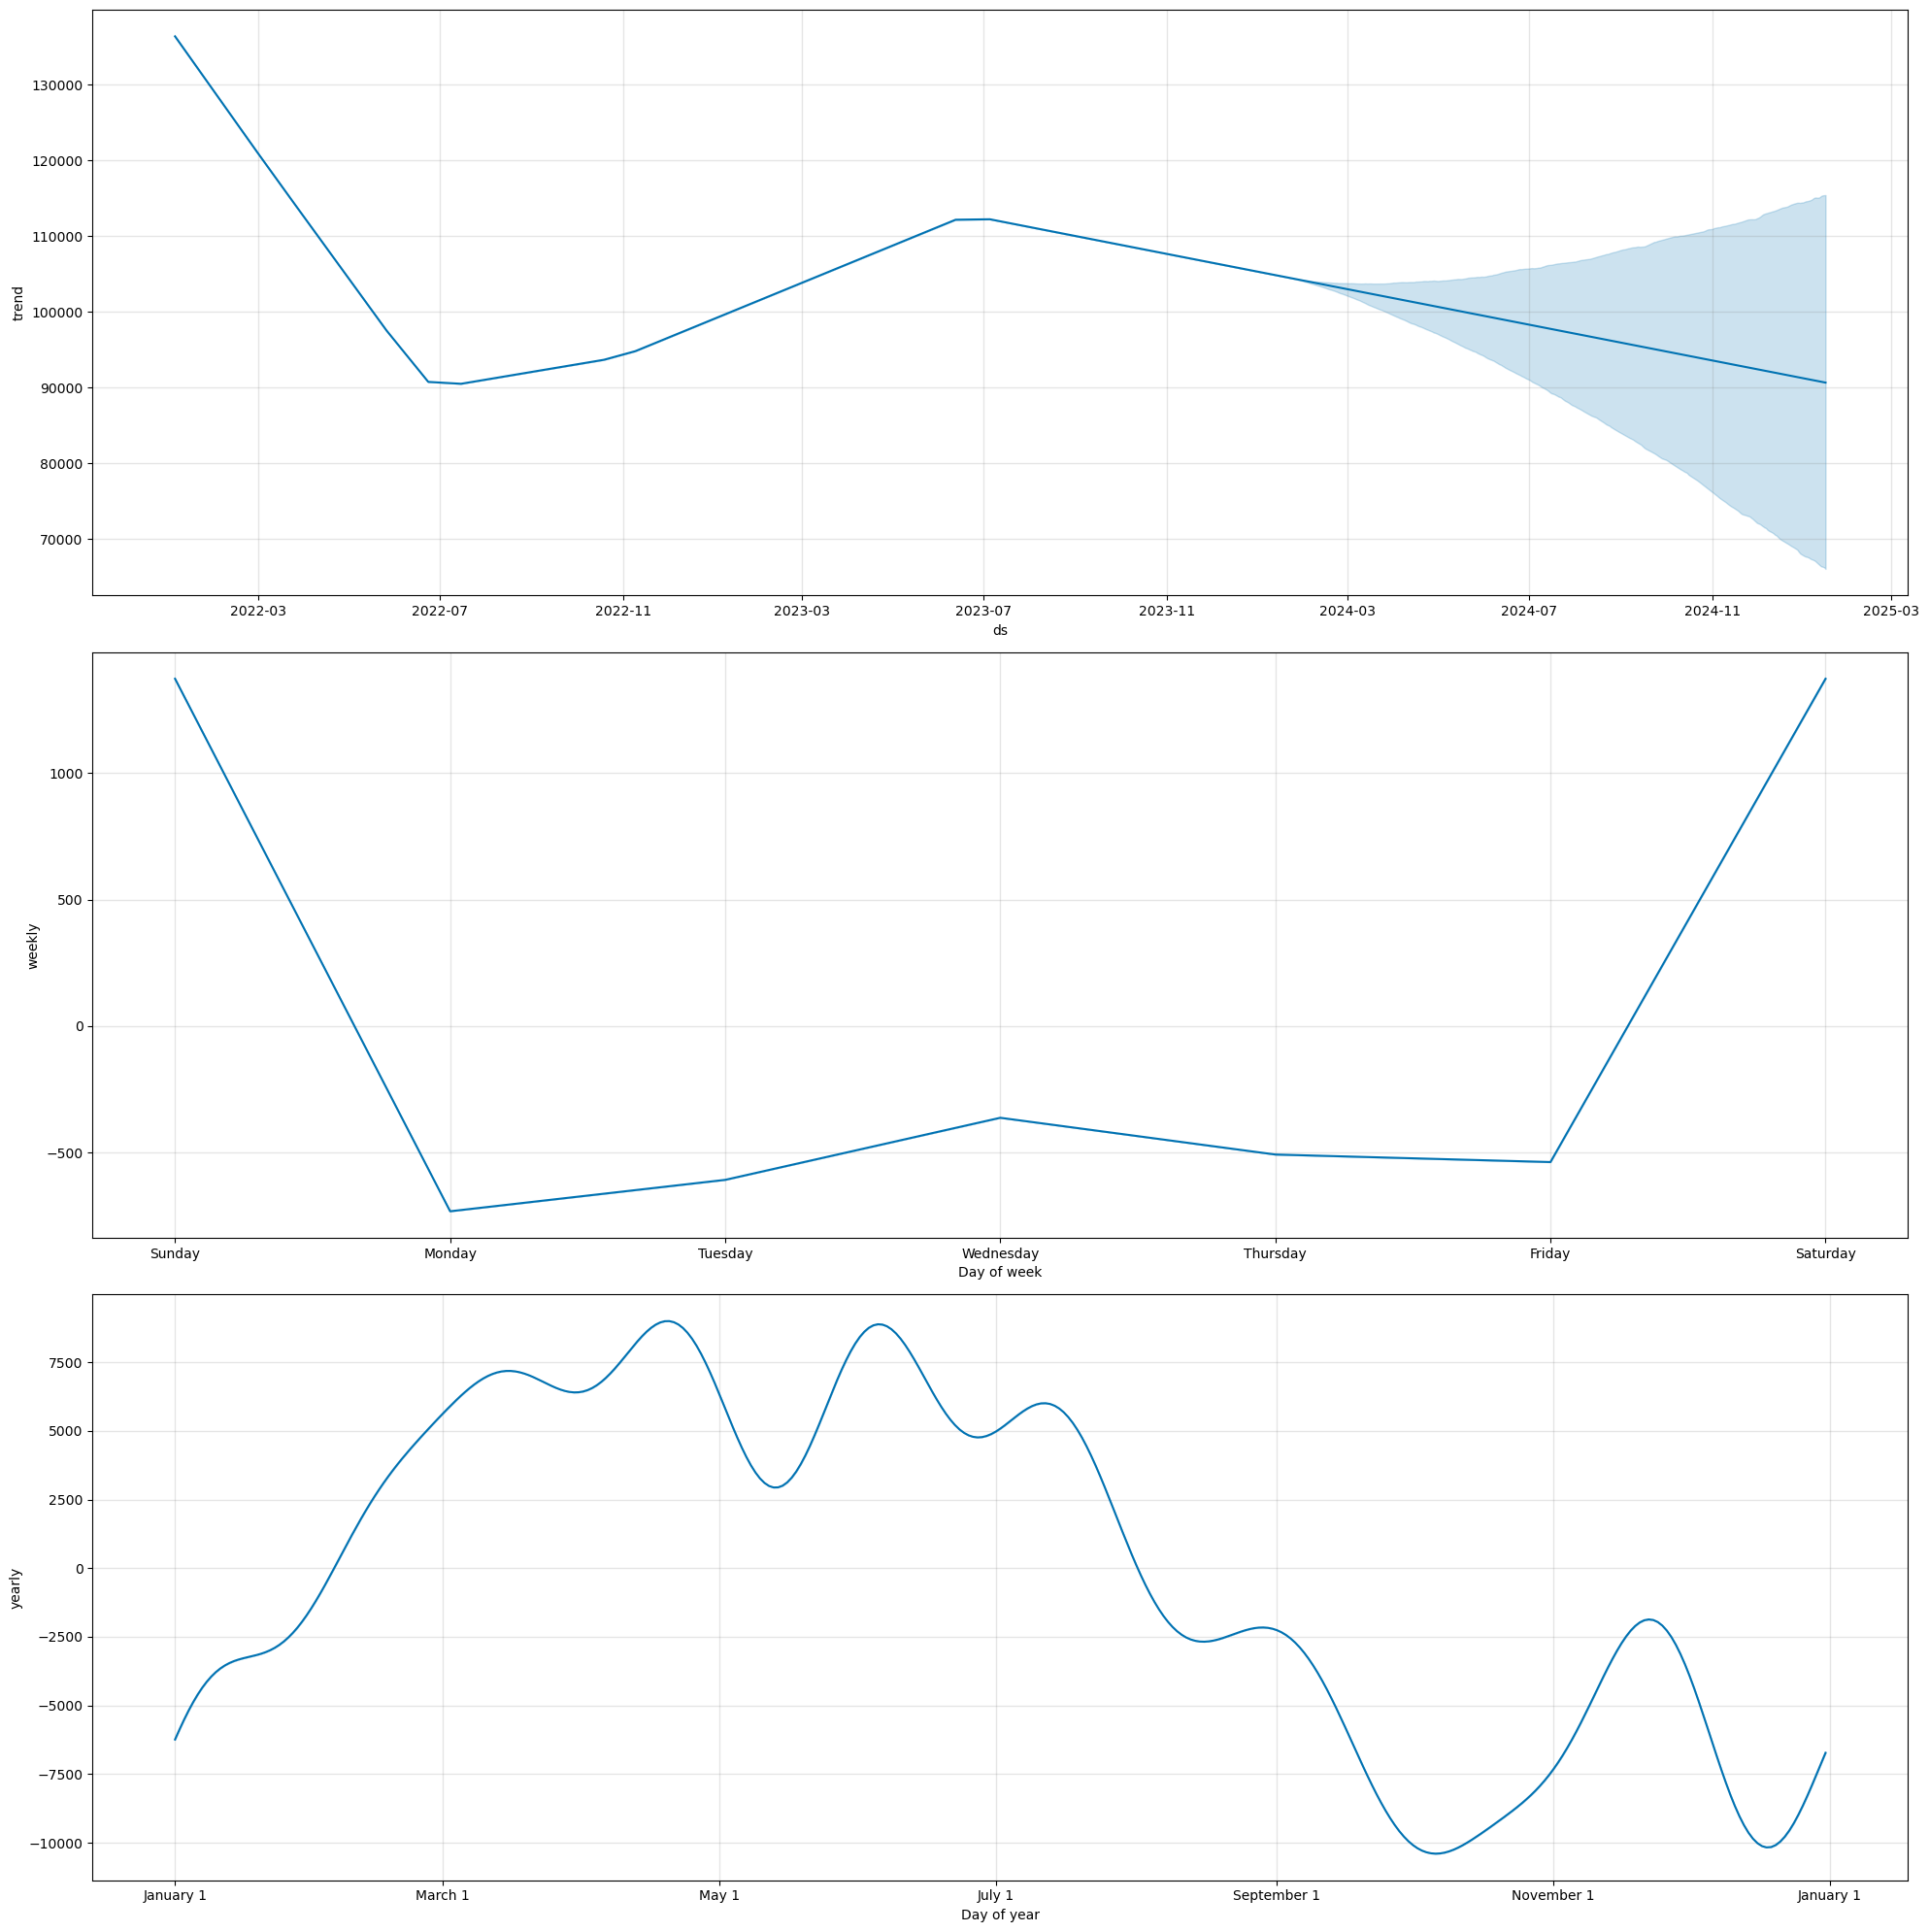

In [88]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

- 월요일에 수치가 떨어지고 금요일에 수치가 올라가는 모습이며, 4월에 가장 높은 수치가 나타났습니다.

In [89]:
train_df = pre_s_df.iloc[:int(len(pre_s_df) * 0.8)]
train_df

,ds,y
0,2022-01-04,139764.7188
1,2022-01-05,136319.8125
2,2022-01-06,132874.9062
3,2022-01-07,135335.5625
4,2022-01-10,127953.6250
...,...,...
381,2023-08-11,102969.6016
382,2023-08-14,100688.0000
383,2023-08-16,98803.1953
384,2023-08-17,99100.7969


<hr>

In [90]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_s_df) * 0.8)
test_len = int(len(pre_s_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_s_df.iloc[: train_len]
test_df = pre_s_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes

10:43:54 - cmdstanpy - INFO - Chain [1] start processing
10:43:54 - cmdstanpy - INFO - Chain [1] done processing
10:43:57 - cmdstanpy - INFO - Chain [1] start processing
10:43:57 - cmdstanpy - INFO - Chain [1] done processing
10:44:00 - cmdstanpy - INFO - Chain [1] start processing
10:44:00 - cmdstanpy - INFO - Chain [1] done processing
10:44:03 - cmdstanpy - INFO - Chain [1] start processing
10:44:03 - cmdstanpy - INFO - Chain [1] done processing
10:44:05 - cmdstanpy - INFO - Chain [1] start processing
10:44:06 - cmdstanpy - INFO - Chain [1] done processing
10:44:08 - cmdstanpy - INFO - Chain [1] start processing
10:44:09 - cmdstanpy - INFO - Chain [1] done processing
10:44:12 - cmdstanpy - INFO - Chain [1] start processing
10:44:12 - cmdstanpy - INFO - Chain [1] done processing
10:44:15 - cmdstanpy - INFO - Chain [1] start processing
10:44:15 - cmdstanpy - INFO - Chain [1] done processing
10:44:18 - cmdstanpy - INFO - Chain [1] start processing
10:44:18 - cmdstanpy - INFO - Chain [1]

In [91]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
6,0.05,10.00,additive,0.091299
0,0.05,0.05,additive,0.091700
1,0.05,0.05,multiplicative,0.092351
3,0.05,0.10,multiplicative,0.092461
2,0.05,0.10,additive,0.092503
4,0.05,1.00,additive,0.092632
8,0.10,0.05,additive,0.100661
12,0.10,1.00,additive,0.100927
14,0.10,10.00,additive,0.101119
10,0.10,0.10,additive,0.101176


In [92]:
model = Prophet(changepoint_prior_scale=0.05, 
                seasonality_prior_scale=1, 
                seasonality_mode='additive')

model.fit(pre_s_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

10:46:49 - cmdstanpy - INFO - Chain [1] start processing
10:46:49 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2022-01-04,130389.570971,124109.520008,136662.692265
1,2022-01-05,130688.799232,124606.720765,137235.302051
2,2022-01-06,130563.181370,124291.565384,137038.602908
3,2022-01-07,130525.622026,123828.041945,136862.063317
4,2022-01-10,130120.855557,123361.027693,136286.988039
...,...,...,...,...
843,2025-01-12,84267.476112,57044.922631,110264.067499
844,2025-01-13,81540.637371,55767.214209,106757.204375
845,2025-01-14,81660.858901,55126.422383,108866.768757
846,2025-01-15,81889.500464,57681.145297,108498.876658


In [93]:
s_df = pre_s_df.copy()
s_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

s_df.index = pd.to_datetime(s_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

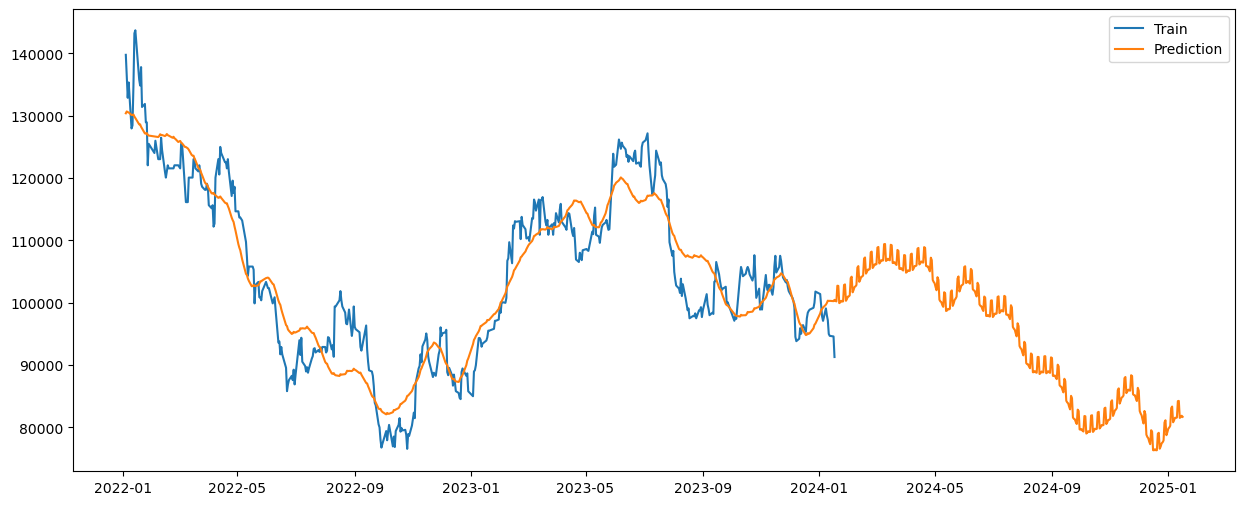

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
plt.plot(s_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

- additive임에도 계절성이 조금 나타나서 구불구불한 모습이다.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


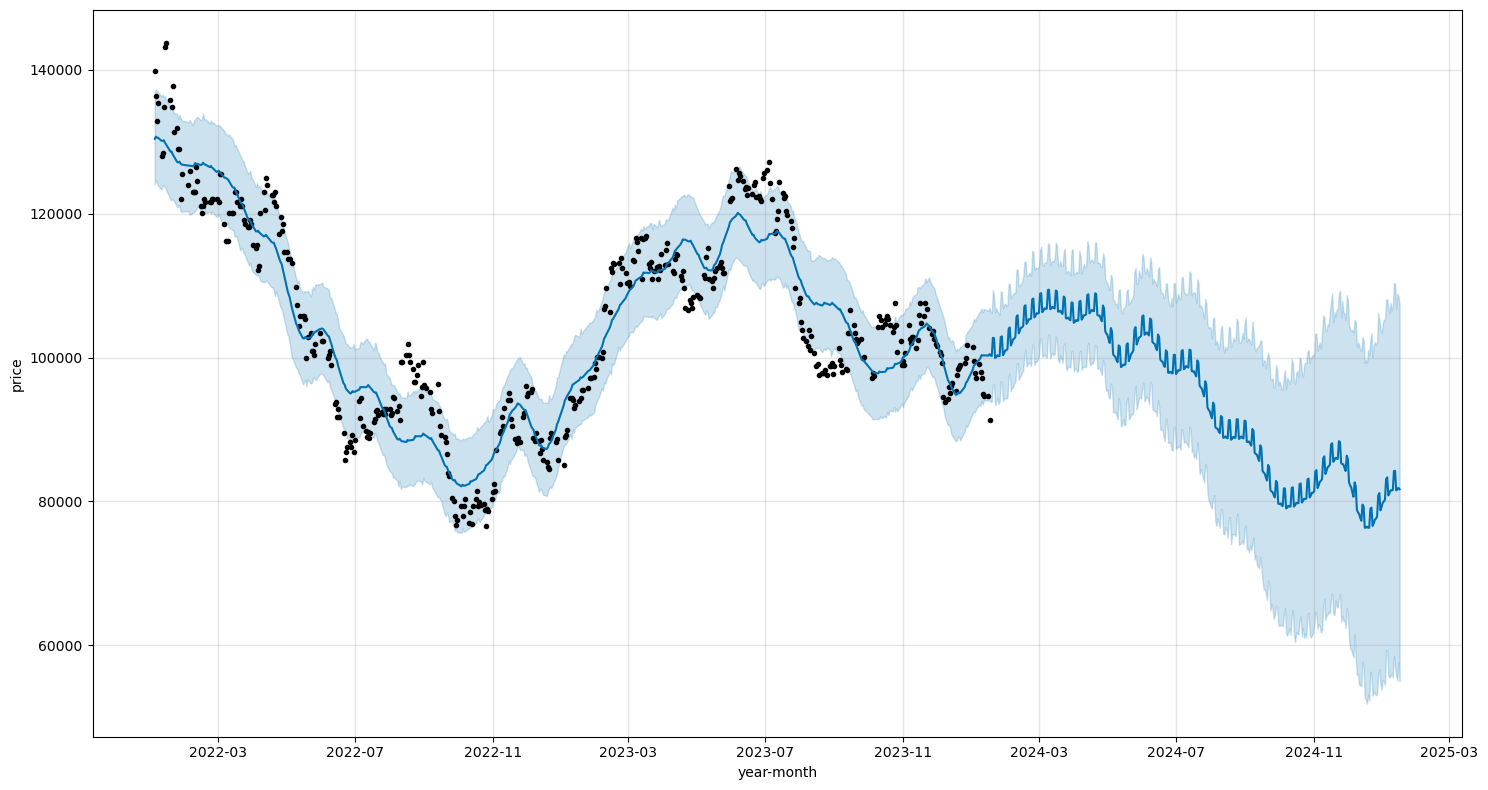

In [95]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

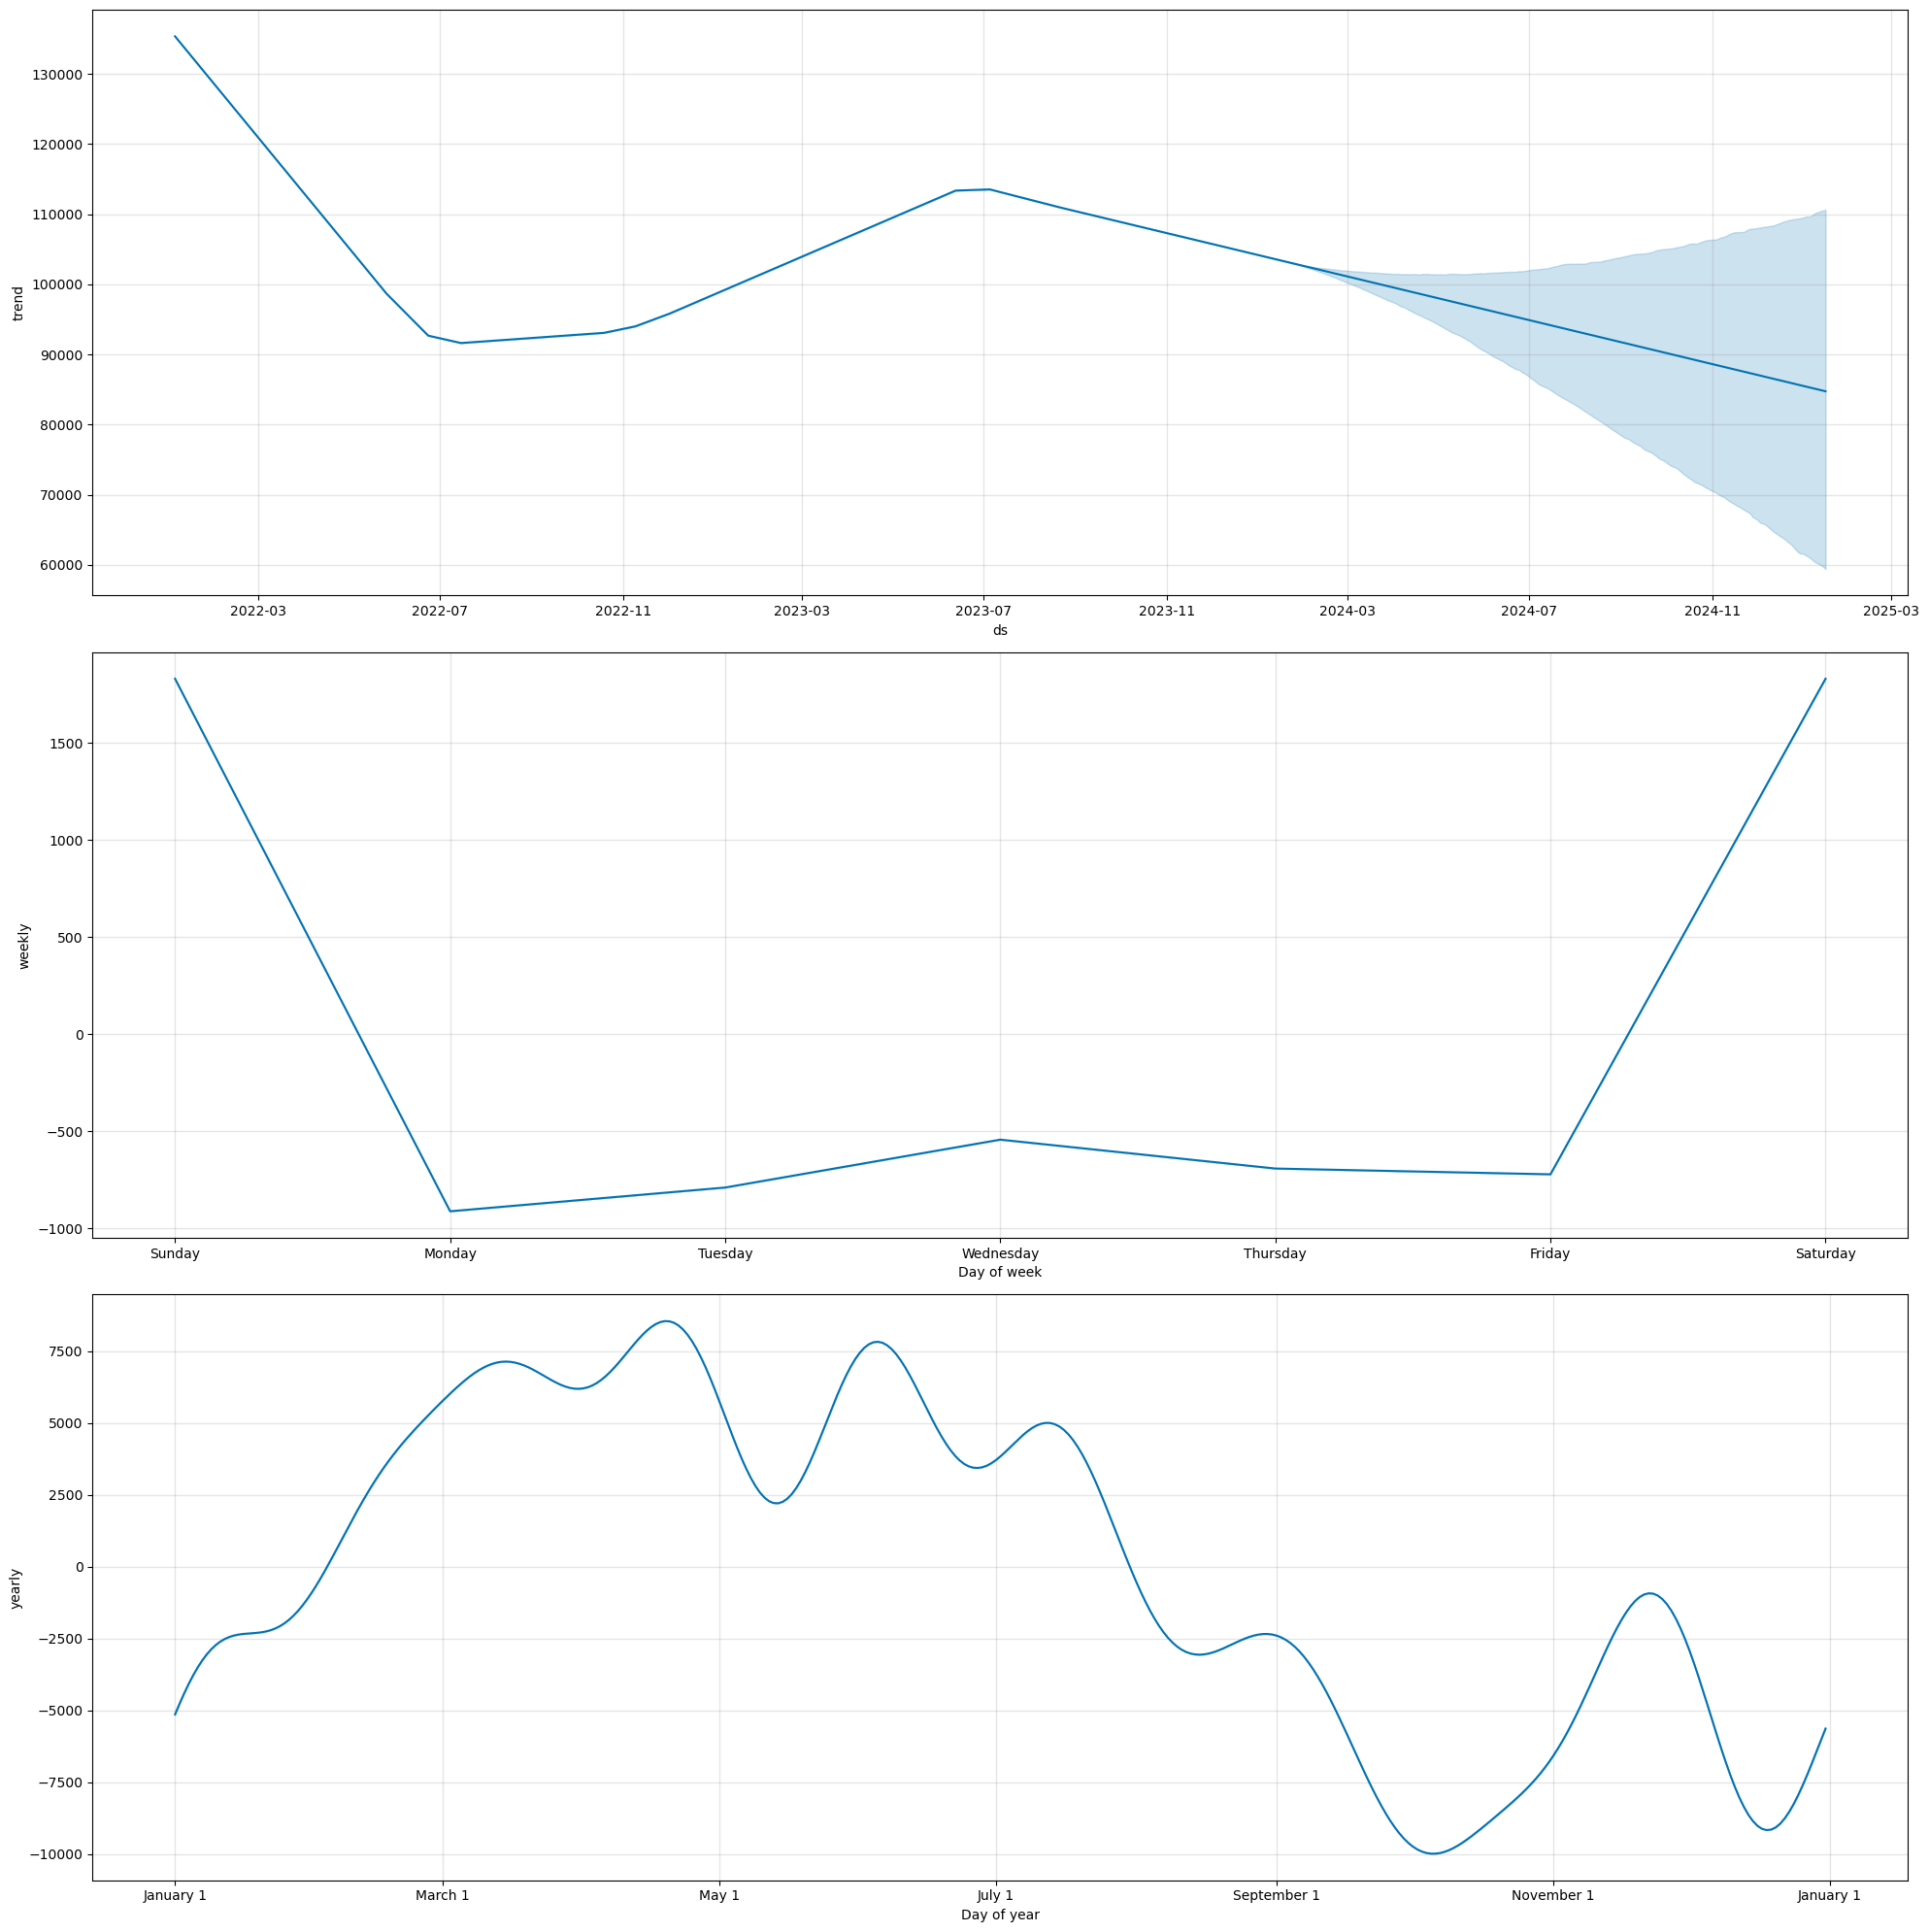

In [96]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

- 파라미터 조정 후에도 큰 차이가 없는 모습입니다.